# Plots for the big simulation

## Imports

In [1]:
from simulations import *
from JobOffer import JobOffer
from User import User
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
import pickle
import seaborn as sns

Using TensorFlow backend.


In [2]:
def get_regret_reward_regrets(agents, folder):
    regrets = []
    regret  = []
    rewards = []
    for agent in agents:
        with open(os.path.join(folder, f"_regret_{agent}.pkl"),"rb") as f:
            regrets.append(pickle.load(f))

        with open(os.path.join(folder, f"_regrets_{agent}.pkl"),"rb") as f:
            regret.append(pickle.load(f))

        with open(os.path.join(folder, f"_rewards_{agent}.pkl"),"rb") as f:
            rewards.append(pickle.load(f))
    return regrets, regret, rewards

def plot_regret_agent(agents, regrets, title):
    plt.figure(figsize = (15, 10))
    for agent, regrets in zip(agents, regrets):
        plt.plot(regrets[:, :, 0].mean(axis=0), label = agent)
    plt.grid()
    plt.legend()
    plt.title(title)
    plt.show()

In [4]:
def plot_rewards(agent_chosen, agents, rewards):
    idx = -1
    for i, agent in enumerate(agents):
        if agent == agent_chosen:
            idx = i
            break
    plt.figure(figsize=(10, 5))
    rewards = rewards[idx][:, :, 0].flatten()
    sns.distplot(rewards, bins = 200)
    plt.title(f"Distribution of the rewards of the agent {agent_chosen}")
    plt.show()

In [3]:
agents_non_evo = ['random', 'ML_linear', 'ML_linear_online', 'ML_gradient', 'ML_gradient_online', 'ML_svr', 'ML_svr_online',
                  'DL_L64', 'DL_L64_online', 'DL_L32L32', 'DL_L32L32_online', 'Dot', 'Embedding', 'Embedding_online']

agents_non_evo_reduced = ['ML_gradient', 'ML_gradient_online', 'ML_svr', 'ML_svr_online',
                          'Dot', 'Embedding', 'Embedding_online']

agents_evo = ['random', 'ML_linear', 'ML_linear_online', 'ML_gradient', 'ML_gradient_online', 'ML_svr', 'ML_svr_online',
              'DL_L64', 'DL_L64_online', 'DL_L32L32', 'DL_L32L32_online', 'Dot']

agents_evo_reduced = ['ML_gradient', 'ML_gradient_online', 'ML_svr', 'ML_svr_online', 'Dot']


regrets_non_evo, regret_non_evo, rewards_non_evo = get_regret_reward_regrets(agents_non_evo, "./data/data_non_evolutive")

regrets_non_evo_reduced, regret_non_evo_reduced, rewards_non_evo_reduced = get_regret_reward_regrets(agents_non_evo_reduced, "./data/data_non_evolutive")

regrets_evo, regret_evo, rewards_evo = get_regret_reward_regrets(agents_evo, "./data/data_evolutive")

regrets_evo_reduced, regret_evo_reduced, rewards_evo_reduced = get_regret_reward_regrets(agents_evo_reduced, "./data/data_evolutive")

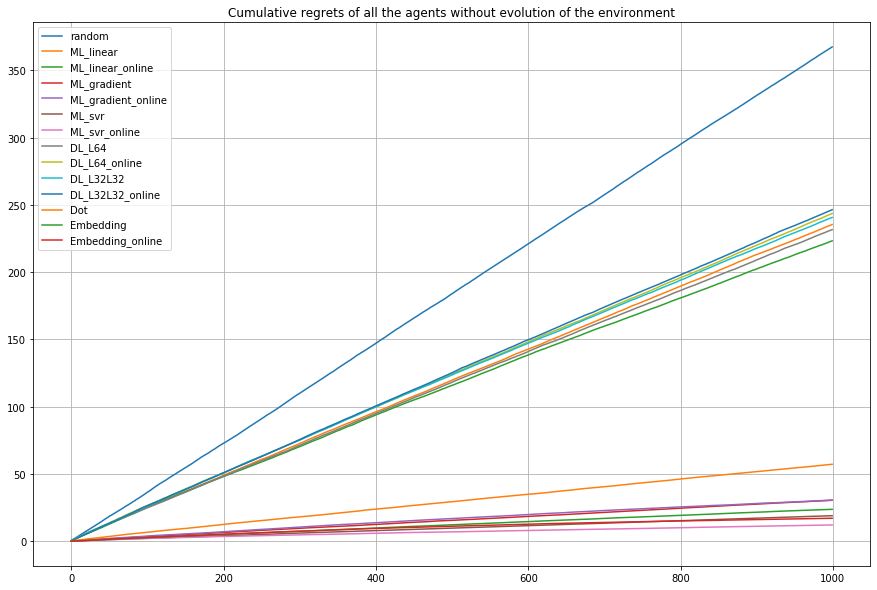

In [20]:
plot_regret_agent(agents_non_evo, regret_non_evo, "Cumulative regrets of all the agents without evolution of the environment")

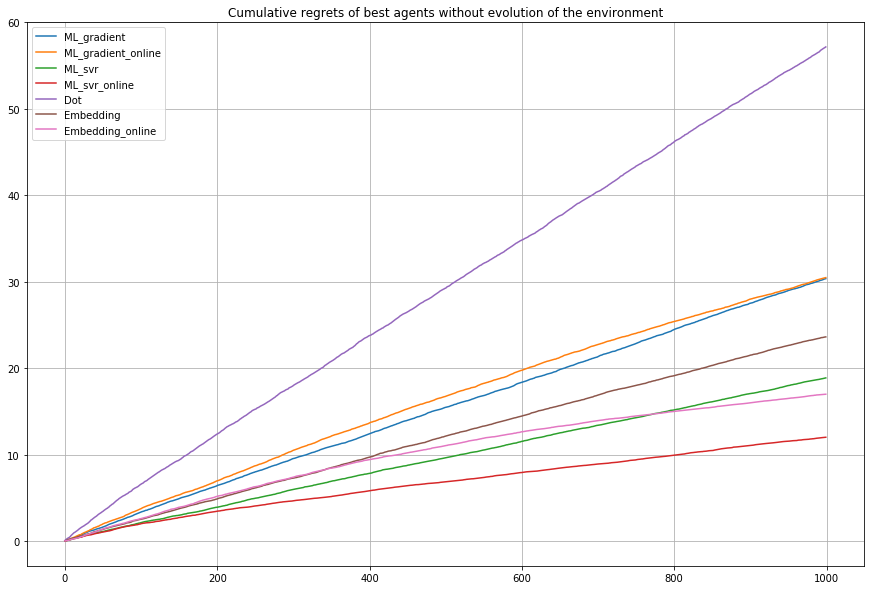

In [21]:
plot_regret_agent(agents_non_evo_reduced, regret_non_evo_reduced, "Cumulative regrets of best agents without evolution of the environment")

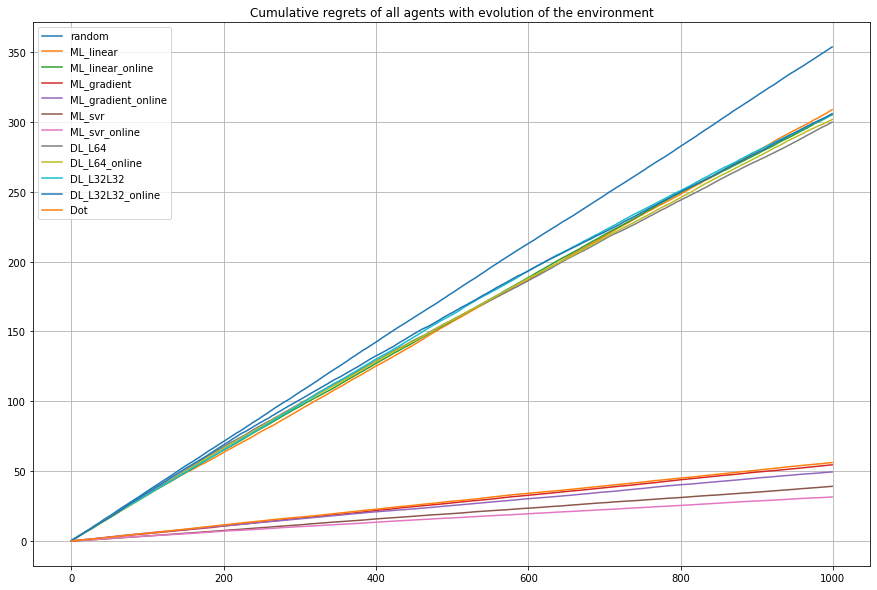

In [22]:
plot_regret_agent(agents_evo, regret_evo, "Cumulative regrets of all agents with evolution of the environment")

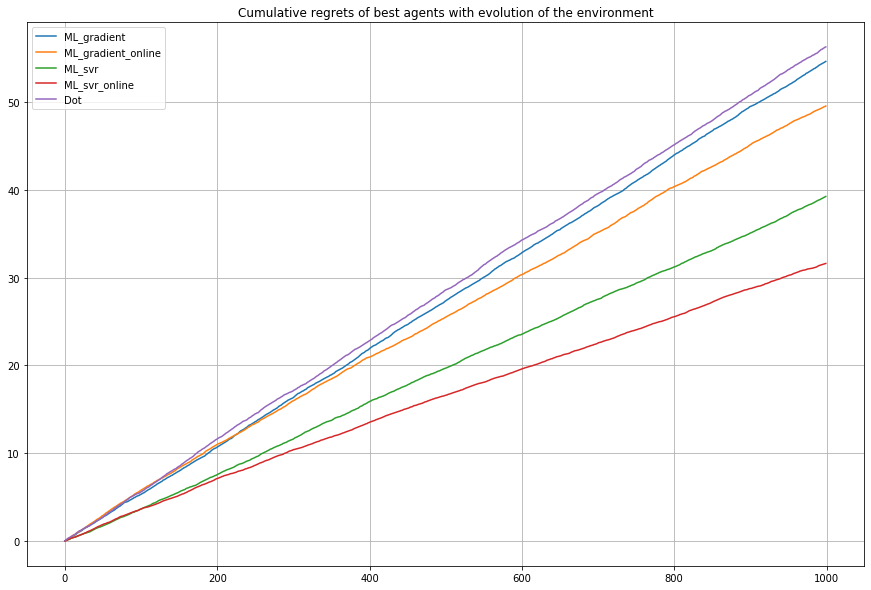

In [23]:
plot_regret_agent(agents_evo_reduced, regret_evo_reduced, "Cumulative regrets of best agents with evolution of the environment")

In [24]:
with open(os.path.join("./data/data_non_evolutive", f"_regret_ML_svr_online.pkl"),"rb") as f:
    regret = pickle.load(f)

with open(os.path.join("./data/data_non_evolutive", f"_regrets_ML_svr_online.pkl"),"rb") as f:
    regrets = pickle.load(f)

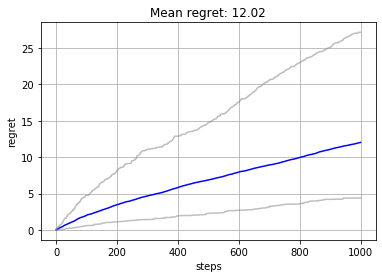

In [9]:
plot_regret(regret, regrets)

random


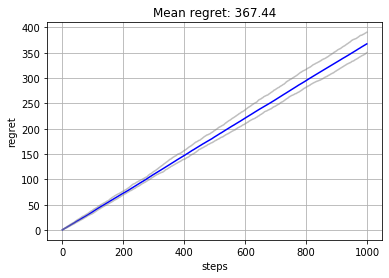

ML_linear


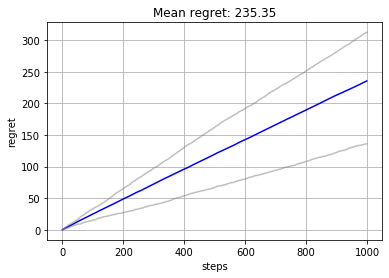

ML_linear_online


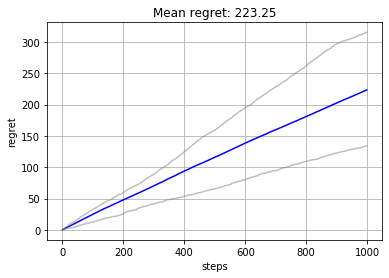

ML_gradient


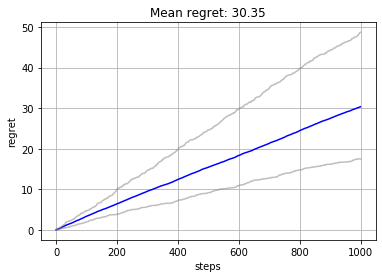

ML_gradient_online


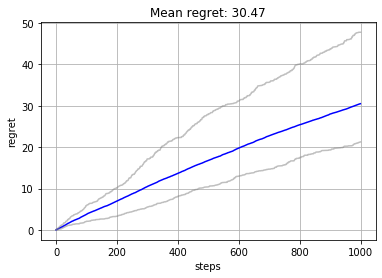

ML_svr


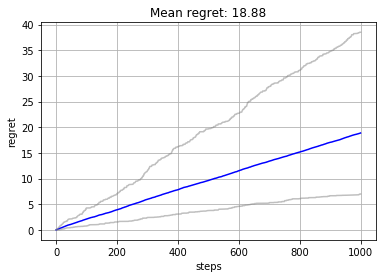

ML_svr_online


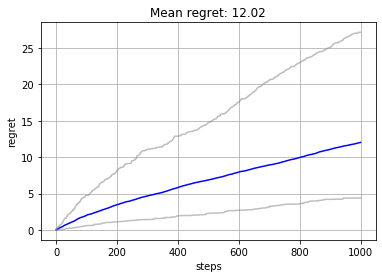

DL_L64


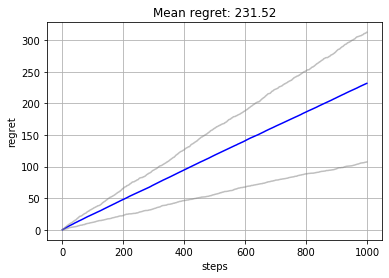

DL_L64_online


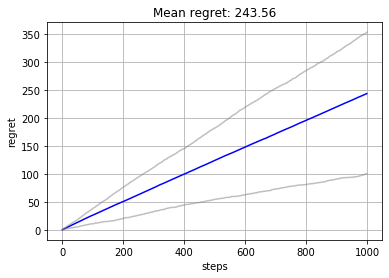

DL_L32L32


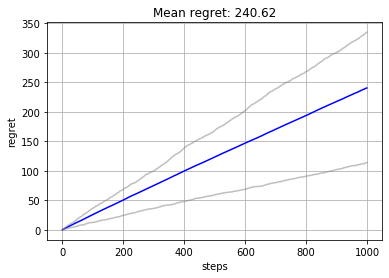

DL_L32L32_online


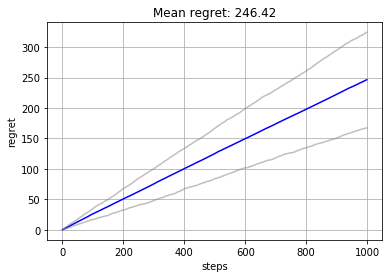

Dot


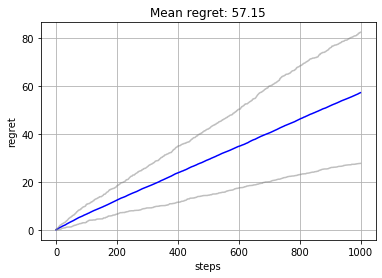

Embedding


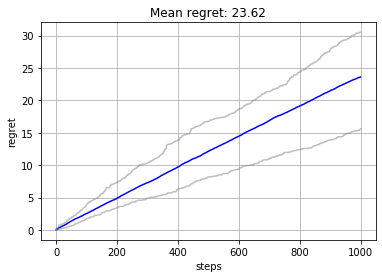

Embedding_online


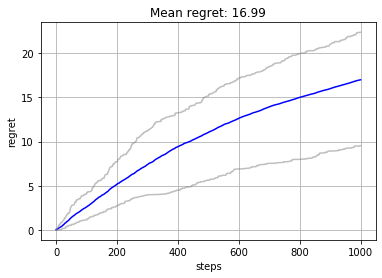

In [10]:
for agent, regret, regrets in zip(agents_non_evo, regret_non_evo, regrets_non_evo):
    print(agent)
    plot_regret(regrets, regret)

random


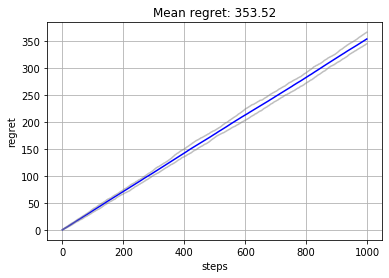

ML_linear


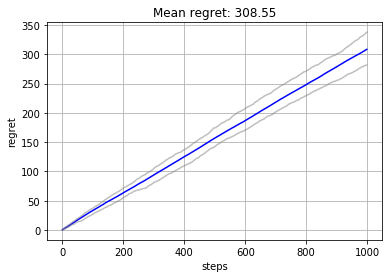

ML_linear_online


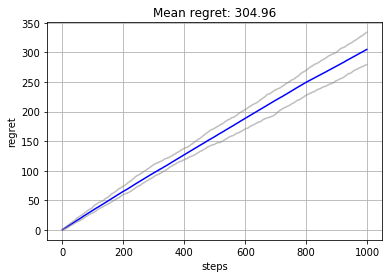

ML_gradient


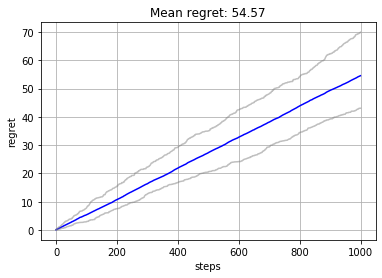

ML_gradient_online


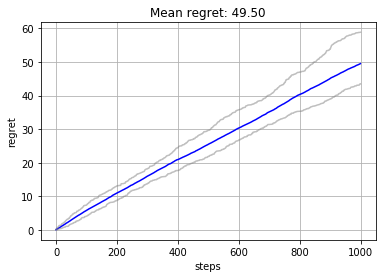

ML_svr


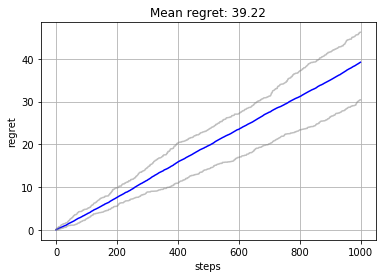

ML_svr_online


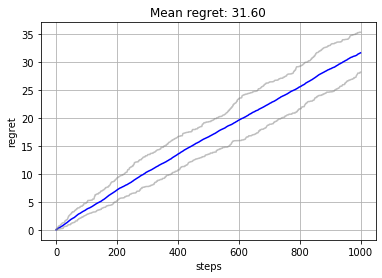

DL_L64


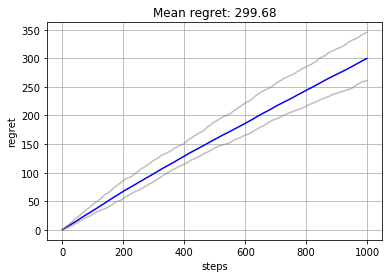

DL_L64_online


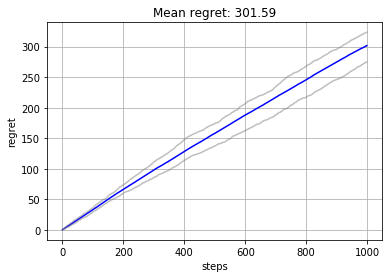

DL_L32L32


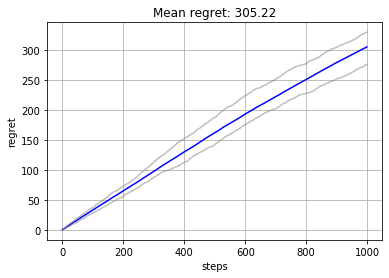

DL_L32L32_online


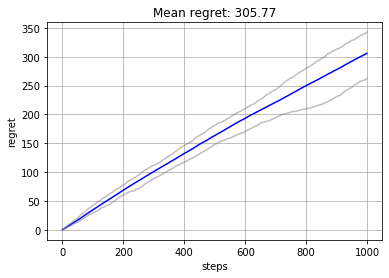

Dot


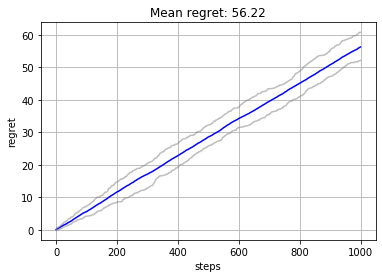

In [11]:
for agent, regret, regrets in zip(agents_evo, regret_evo, regrets_evo):
    print(agent)
    plot_regret(regrets, regret)

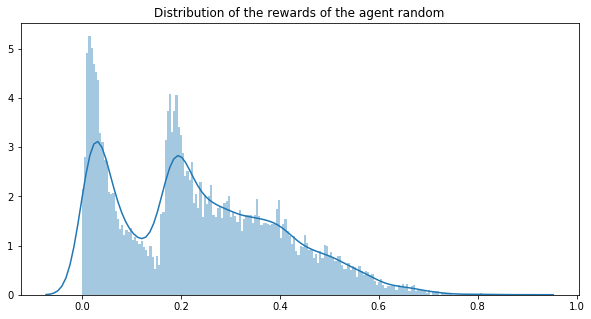

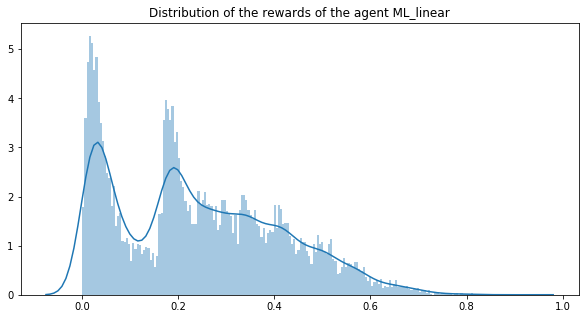

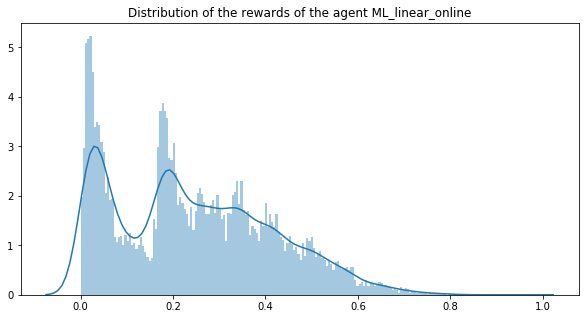

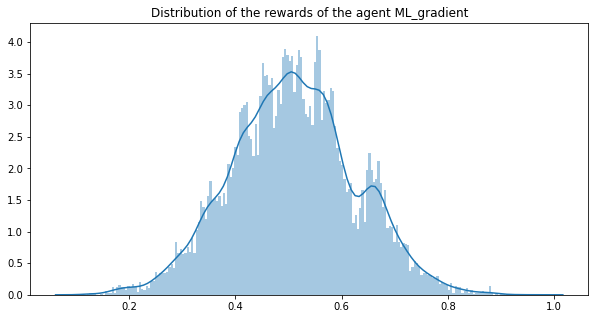

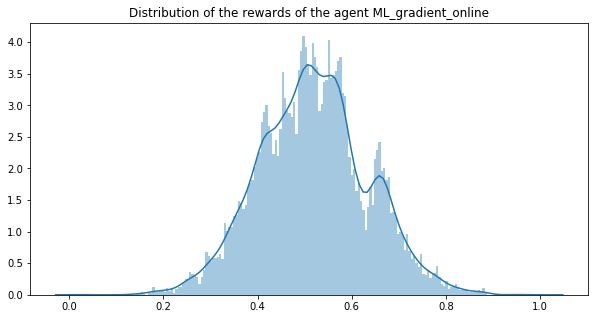

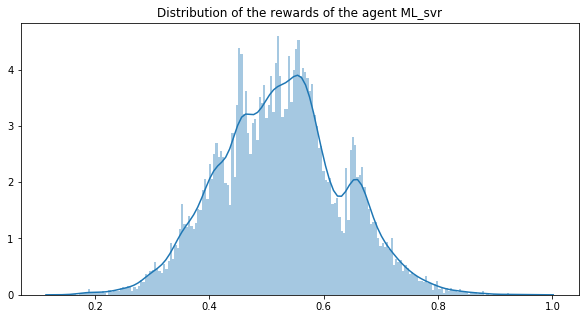

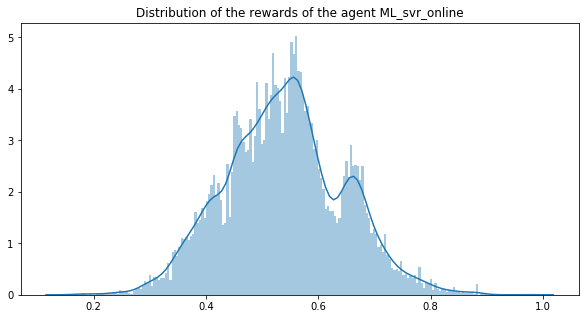

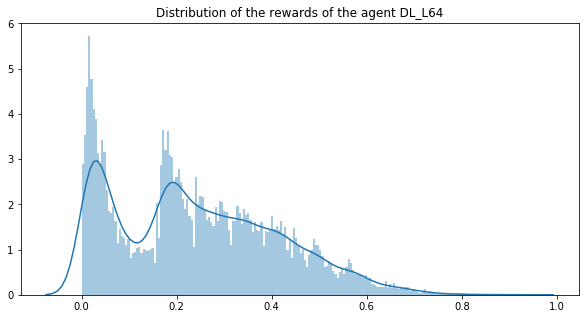

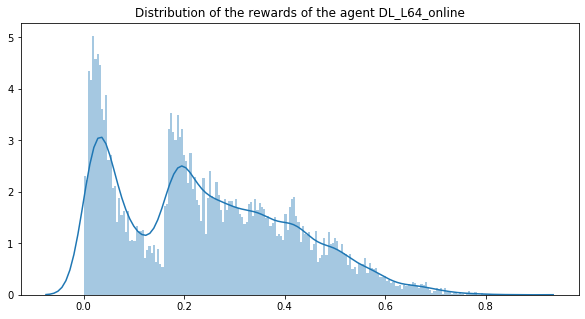

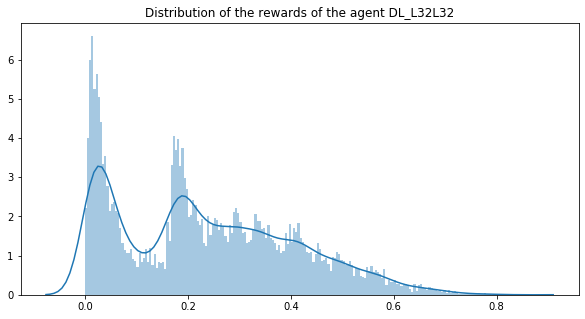

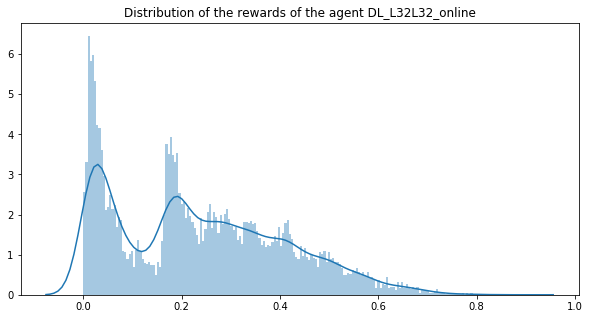

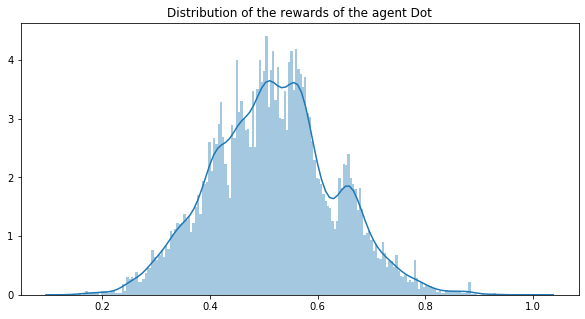

In [6]:
for agent in agents_evo:
    plot_rewards(agent, agents_evo, rewards_evo)

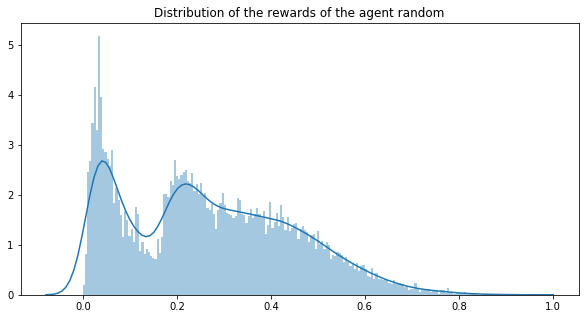

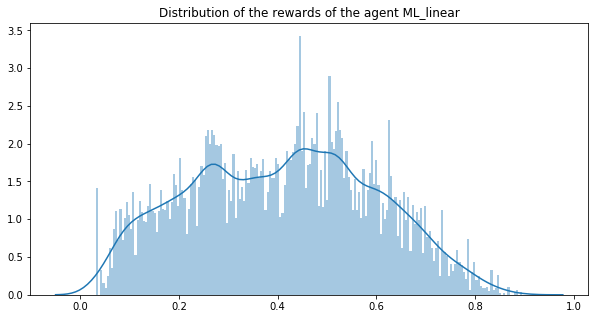

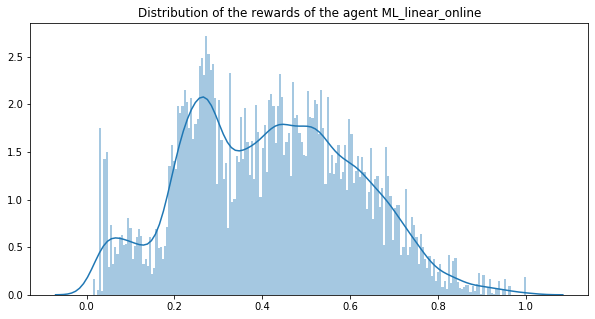

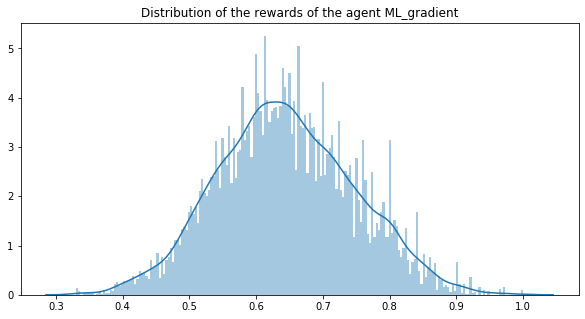

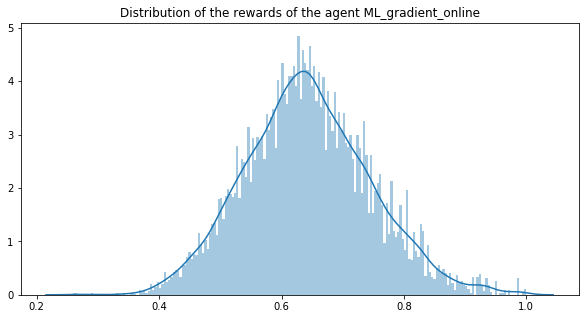

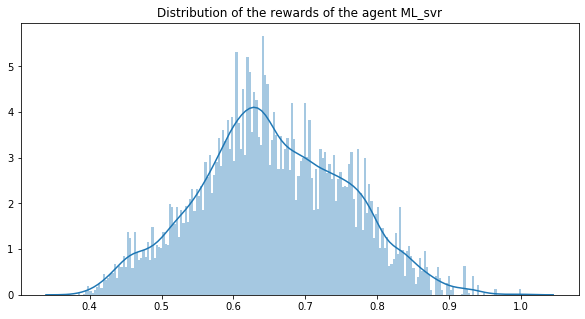

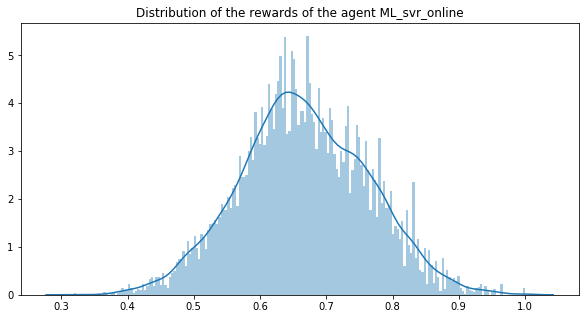

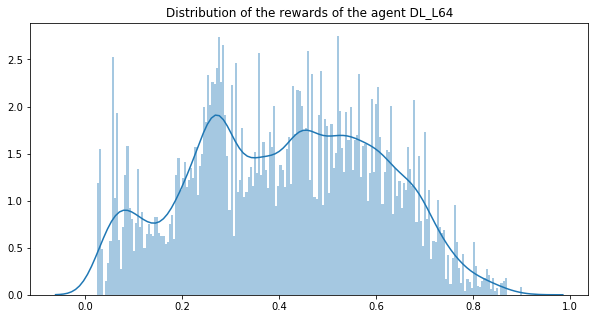

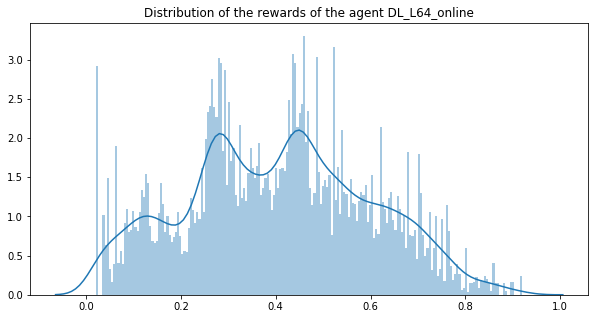

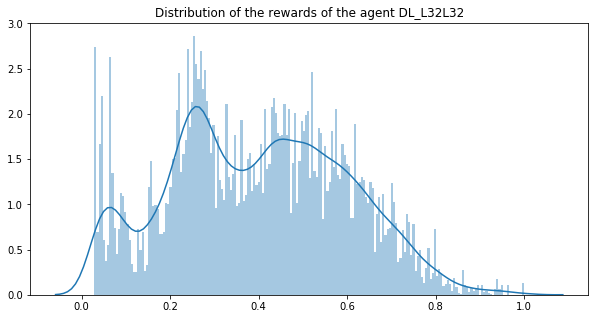

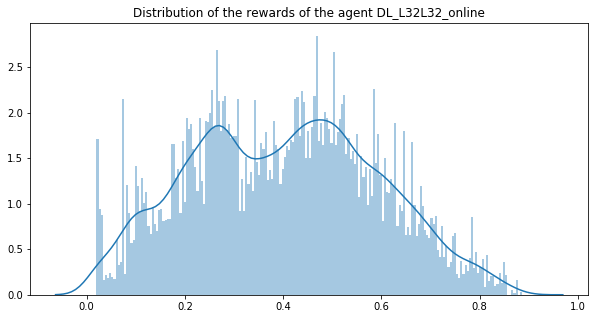

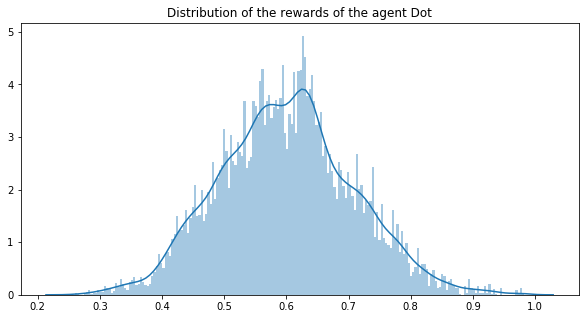

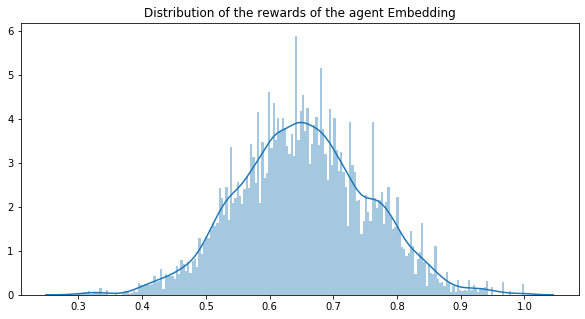

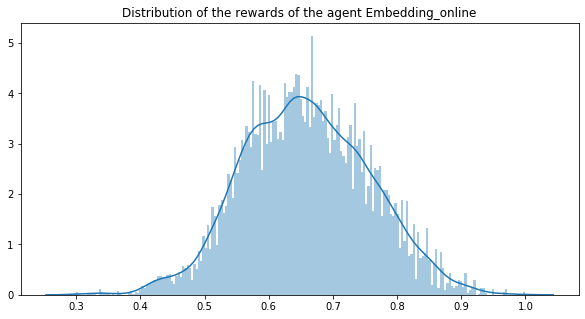

In [7]:
for agent in agents_non_evo:
    plot_rewards(agent, agents_non_evo, rewards_non_evo)